In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [22]:
df = pd.read_csv("Silver Data Last Year.csv")
df = df.drop([310,311],axis=0)
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)
df["Price"] = df.Price.astype(float)
df["Open"] = df.Price.astype(float)
df["High"] = df.Price.astype(float)
df["Low"] = df.Price.astype(float)
df=df.sort_values(by = "Date", ascending=True)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
309,2016-08-28,18.540,18.540,18.540,18.540,0,-2.37
308,2016-08-29,19.100,19.100,19.100,19.100,0.00K,3.02
307,2016-08-30,18.914,18.914,18.914,18.914,0.00K,-0.97
306,2016-08-31,18.945,18.945,18.945,18.945,0.00K,0.16
305,2016-09-01,19.179,19.179,19.179,19.179,0.06K,1.24


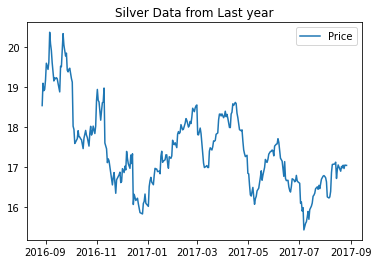

In [23]:
plt.plot(df["Date"],df["Price"],label = "Price")
plt.legend()
plt.title("Silver Data from Last year")
plt.show()

In [24]:
training_set = df.iloc[:,1:2].values
training_set.shape

(310, 1)

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [26]:
X_train = []
y_train = []
for i in range(60,training_set.shape[0]):
  X_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [27]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(250, 60, 1)

In [28]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
# LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=50, return_sequences=True))
# LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=50, return_sequences=True))
# LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=50, return_sequences=True))
# LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=50, return_sequences=True))
# LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=50, return_sequences=True))
# LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=50))
# LSTM_model.add(Dropout(0.2))

LSTM_model.add(Dense(1))

In [29]:
LSTM_model.compile(optimizer="adam",loss="mean_squared_error")
LSTM_model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
8/8 [==============================] - 13s 206ms/step - loss: 0.0540
Epoch 2/100
8/8 [==============================] - 2s 206ms/step - loss: 0.0242
Epoch 3/100
8/8 [==============================] - 2s 205ms/step - loss: 0.0231
Epoch 4/100
8/8 [==============================] - 2s 205ms/step - loss: 0.0217
Epoch 5/100
8/8 [==============================] - 2s 222ms/step - loss: 0.0225
Epoch 6/100
8/8 [==============================] - 2s 204ms/step - loss: 0.0217
Epoch 7/100
8/8 [==============================] - 2s 205ms/step - loss: 0.0212
Epoch 8/100
8/8 [==============================] - 2s 206ms/step - loss: 0.0207
Epoch 9/100
8/8 [==============================] - 2s 205ms/step - loss: 0.0206
Epoch 10/100
8/8 [==============================] - 2s 209ms/step - loss: 0.0208
Epoch 11/100
8/8 [==============================] - 2s 214ms/step - loss: 0.0206
Epoch 12/100
8/8 [==============================] - 2s 203ms/step - loss: 0.0198
Epoch 13/100
8/8 [==================

In [30]:
df2 = pd.read_csv("Silver Data Last Month.csv")
df2 = df2.drop([28,29],axis=0)
df2=df2.sort_values(by = "Date", ascending=True)
df2['Date'] =  pd.to_datetime(df2['Date'], infer_datetime_format=True)
df2["Price"] = df2.Price.astype(float)
df2["Open"] = df2.Price.astype(float)
df2["High"] = df2.Price.astype(float)
df2["Low"] = df2.Price.astype(float)

In [31]:
actual_price = df2.iloc[:,1:2].values
actual_price.shape

(28, 1)

In [32]:
input_dataset = pd.concat((df["Price"], df2["Price"]), axis = 0)
inputs = input_dataset[len(input_dataset)-len(df2)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [33]:
predicted_price = LSTM_model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

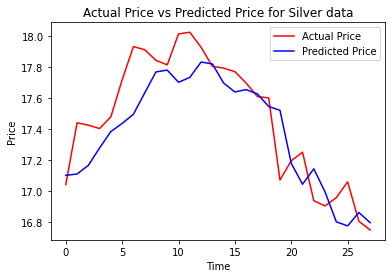

In [34]:
plt.plot(actual_price,color="red", label = "Actual Price")
plt.plot(predicted_price, color="blue", label = "Predicted Price")
plt.title("Actual Price vs Predicted Price for Silver data")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()